<center> <h1> <i> <strong style="color:green">PREDICTING WINE QUALITY <i></strong></h1></center>

 <center> <h2>K NEAREST NEIGHBORS</h2></center>

<h3 style="color:red">RED WINE</h3>

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd

#check which version of sklearn is installed
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.3.


In [35]:
from sklearn.model_selection import train_test_split
#contains utilities for scaling, transforming, and wrangling data.
from sklearn import preprocessing
from sklearn.preprocessing import scale
#tools to help perform cross-validation.
from sklearn.model_selection import GridSearchCV
#import some metrics we can use to evaluate our model performance later.
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
#dowloaded manually as the .csv files needed to be formatted before import to pandas
red_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

df_redwine = pd.read_csv(red_url, sep=';')
df_whitewine = pd.read_csv(white_url, sep=';')

In [37]:
df_whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [38]:
df_redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
# fit the transformer API
df_redwine_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_redwine), columns=df_redwine.columns)
df_redwine_scaled.head()

C:\Users\ljkop\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ljkop\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [40]:
df_redwine_corr = df_redwine_scaled.corr()
df_redwine_corr
#df_redwine_corr.to_csv(r'C:\Users\ljkop\BootCampHW\finalproject\RedWine_Corr.csv', header=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [43]:
y = df_redwine_scaled['quality'].values
X = df_redwine_scaled.drop('quality', axis=1)

In [44]:
#split data into train and test sets
##  stratify=y:  A stratified sample is one that ensures that subgroups (strata) of a 
#given population are each adequately represented within the whole sample population of a research study.
##  test_size=0.2:  set 20% of dataset aside as a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [45]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
#find best k value
#to store rmse values for different k
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.9443597128378729
RMSE value for k=  2 is: 0.8941572466733887
RMSE value for k=  3 is: 0.8700751470366148
RMSE value for k=  4 is: 0.8522898094410433
RMSE value for k=  5 is: 0.8579529269531112
RMSE value for k=  6 is: 0.8412007222639102
RMSE value for k=  7 is: 0.842445428696867
RMSE value for k=  8 is: 0.8404285151040526
RMSE value for k=  9 is: 0.8398186081773373
RMSE value for k=  10 is: 0.8430985266439459
RMSE value for k=  11 is: 0.8410692075141535
RMSE value for k=  12 is: 0.8373723291260371
RMSE value for k=  13 is: 0.8323926571469962
RMSE value for k=  14 is: 0.8288918880044428
RMSE value for k=  15 is: 0.8322838850963772
RMSE value for k=  16 is: 0.8340754376219539
RMSE value for k=  17 is: 0.8337362875875566
RMSE value for k=  18 is: 0.829535450852842
RMSE value for k=  19 is: 0.8256180223133884
RMSE value for k=  20 is: 0.8262168254491428


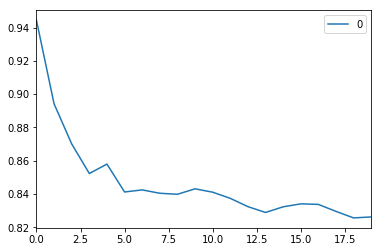

In [47]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

<p style="color:green">expected an elbow curve with rmse slowly rising after hitting a min</p>
<p style="color:green">instead, rmse continues to decrease inversely to K</p>

In [52]:
## Create KNN object, use best_params_ to find optimal K
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[9,10,11,12,13,14,15]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=7)
model.fit(X_train,y_train)
model.best_params_


{'n_neighbors': 14}

In [53]:
y_pred = model.predict(X_test)
score=r2_score(y_test,y_pred)
print(f"R2 Score: {score}")

R2 Score: 0.3060310267335945


In [27]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6928775356722368, R2: 0.30015678556985315


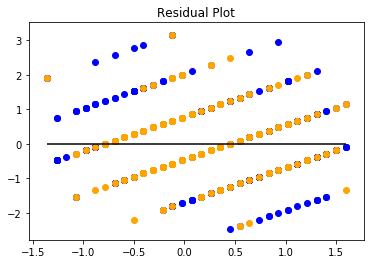

<Figure size 432x288 with 0 Axes>

In [26]:
# plot residuals
predictions = model.predict(X_train)
# Plot Residuals
plt.scatter(predictions, predictions - y_train, c="blue", label="Training Data")
plt.scatter(y_pred, y_pred - y_test, c="orange", label="Testing Data")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()
plt.savefig('red_residual_KNear.png')

<h3 style="color:green">WHITE WINE</h3>

In [ ]:
# #missing values in Item_weight and Outlet_size needs to be imputed
# mean = df['Item_Weight'].mean() #imputing item_weight with mean
# df['Item_Weight'].fillna(mean, inplace =True)

# mode = df['Outlet_Size'].mode() #imputing outlet size with mode
# df['Outlet_Size'].fillna(mode[0], inplace =True)

In [20]:
# fit the transformer API
df_whitewine_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_whitewine), columns=df_whitewine.columns)
df_whitewine_scaled.head()

C:\Users\ljkop\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ljkop\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


In [21]:
y = df_redwine_scaled['quality'].values
X = df_redwine_scaled.drop('quality', axis=1)

In [23]:
#split data into train and test sets
##  stratify=y:  A stratified sample is one that ensures that subgroups (strata) of a 
#given population are each adequately represented within the whole sample population of a research study.
##  test_size=0.2:  set 20% of dataset aside as a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [24]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#find best k value
#to store rmse values for different k
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.9443597128378729
RMSE value for k=  2 is: 0.8941572466733887
RMSE value for k=  3 is: 0.8700751470366148
RMSE value for k=  4 is: 0.8522898094410433
RMSE value for k=  5 is: 0.8579529269531112
RMSE value for k=  6 is: 0.8412007222639102
RMSE value for k=  7 is: 0.842445428696867
RMSE value for k=  8 is: 0.8404285151040526
RMSE value for k=  9 is: 0.8398186081773373
RMSE value for k=  10 is: 0.8430985266439459
RMSE value for k=  11 is: 0.8410692075141535
RMSE value for k=  12 is: 0.8373723291260371
RMSE value for k=  13 is: 0.8323926571469962
RMSE value for k=  14 is: 0.8288918880044428
RMSE value for k=  15 is: 0.8322838850963772
RMSE value for k=  16 is: 0.8340754376219539
RMSE value for k=  17 is: 0.8337362875875566
RMSE value for k=  18 is: 0.829535450852842
RMSE value for k=  19 is: 0.8256180223133884
RMSE value for k=  20 is: 0.8262168254491428


In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

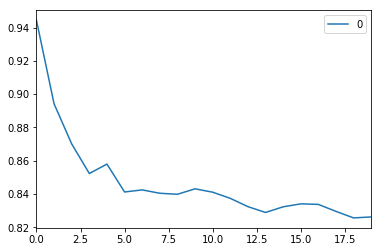

In [26]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

<p style="color:green">expected an elbow curve with rmse slowly rising after hitting a min</p>
<p style="color:green">instead, rmse continues to decrease inversely to K</p>

In [28]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[9,10,11,12,13,14,15]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 13}

In [29]:
y_pred = model.predict(X_test)
score=r2_score(y_test,y_pred)
print(f"R2 Score: {score}")

R2 Score: 0.30015678556985315


In [30]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6928775356722368, R2: 0.30015678556985315


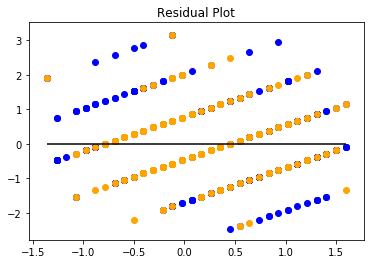

<Figure size 432x288 with 0 Axes>

In [31]:
# plot residuals
predictions = model.predict(X_train)
# Plot Residuals
plt.scatter(predictions, predictions - y_train, c="blue", label="Training Data")
plt.scatter(y_pred, y_pred - y_test, c="orange", label="Testing Data")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()
plt.savefig('red_residual_KNear.png')